## Baseline
The baseline performance for the Lakshmipathi N notebook is:
 * accuracy score : 0.751
 * precision score: 0.75
 * accuracy score: 0.75
 * f1 score: 0.75

In [1]:
# Import necessary libraries
import pandas as pd

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize.toktok import ToktokTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re
import os

[nltk_data] Downloading package stopwords to /Users/silvercloud-
[nltk_data]     lene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Import training data
imdb_data=pd.read_csv('IMDB_dataset.csv')

#Adapted from Lakshmipathi N 2020

## Exploratory Data Analysis
### Summary of dataset

In [7]:
# Description of the dataframe
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
# Shape of the dataframe (rows, columns)
print(imdb_data.shape)

(50000, 2)


In [9]:
# View the top 10 rows of the dataset
imdb_data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


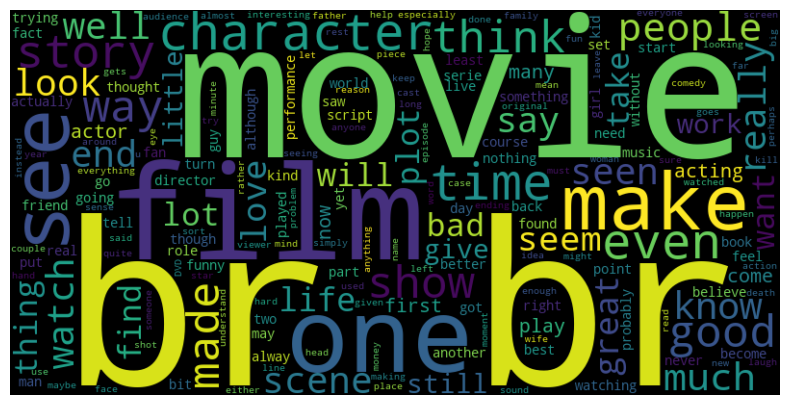

In [11]:
# Create a word cloud
# Concatenate the text from the review column into a single string.
wordcloud_text = ' '.join(imdb_data['review'])

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400).generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Adapted from Valkov 2019

#### Sentiment distribution
We want to ensure that we have a balanced dataset to avoid introducing bias into our model.

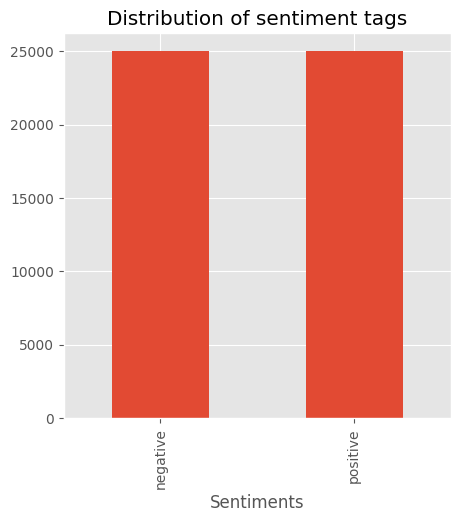

In [12]:
# Draw a bar chart to show the distribution of the data in the sentiment column.
axis = imdb_data['sentiment'].value_counts().sort_index()\
    .plot(kind="bar",
          title="Distribution of sentiment tags",
          figsize=(5,5))
axis.set_xlabel('Sentiments')
plt.show()
# New Code

## Following Lakshmipathi N's approach
### Preprocessing

#### Remove HTML tags

In [13]:
#Function to strip HTML tags
def strip_html(text):
    # Check if the input looks like a file name
    if os.path.isfile(text):
        with open(text, 'r') as file:
            soup = BeautifulSoup(file, "html.parser")
    else:
        soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Function that combines the above to functions to clean up junk text
def remove_junk_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Apply the remove_junk_text function to the IMDB dataset
imdb_data['review'] = imdb_data['review'].apply(remove_junk_text)

#Adapted code from Lakshmipathi N 2020 with some changes

/var/folders/fp/sfmgsyr555b7vfy1lp18nrjw0000gn/T/ipykernel_17880/3089871143.py:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


#### Remove special characters

In [14]:
# Function to remove special characters
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

# Apply the remove_special_characters function to the dataset review  column
imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)

#Lakshmipathi N 2020

#### Remove extra spaces

In [15]:
# The function to remove white spaces
def remove_excessive_spaces(text):
    cleaned_text = re.sub('\s+', ' ', text)
    return cleaned_text.strip()

# Apply the function to the review column of the IMDB data
imdb_data['review'] = imdb_data['review'].apply(remove_excessive_spaces)

# New Code

#### Text stemming

In [16]:
#Stemming the text with the Porter stemming algorithm from NLTK
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

# Check the result of the stemming process
imdb_data.head(5)

#Lakshmipathi N 2020

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl product the film techniqu is ve...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive


#### Removing stopwords

In [17]:
# Setting English stopwords
stop=set(stopwords.words('english'))

#Initialise a tokenizer
tokenizer=ToktokTokenizer()

# Function to remove the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

#Lakshmipathi N 2020

# Test an example
review = "This is an example review with stopwords."
filtered_review = remove_stopwords(review)
print(filtered_review)
#New Code

example review stopwords .


In [18]:
imdb_data.head(10)

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive
5,probabl alltim favorit movi stori selfless sac...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,thi show wa amaz fresh innov idea 70 first air...,negative
8,encourag posit comment thi film wa look forwar...,negative
9,like origin gut wrench laughter like thi movi ...,positive


### Classification approach
#### Feature extraction

In [19]:
# Use the CountVectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transform reviews
cv_reviews=cv.fit_transform(imdb_data.review)

# Check results
print('Bag of Words - cv_reviews:',cv_reviews.shape)

#Adapted code from Lakshmipathi N 2020 with some changes

Bag of Words - cv_reviews: (50000, 7528779)


In [20]:
# Label the sentiment data
lb=LabelBinarizer()

# Transform the sentiment data
sentiment_data=lb.fit_transform(imdb_data.sentiment)

# Check the results
print(sentiment_data.shape)

#Adapted code from Lakshmipathi N 2020 with some changes

(50000, 1)


#### Testing and training split

In [21]:
# Use sklearn to split the dataset into training and testing datasets
x = cv_reviews #input features
y = sentiment_data #labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

#New Code

#### Model training

In [22]:
# Train the multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
import numpy as np

mnb_model = MultinomialNB()

# Reshape train_sentiments into a 1-dimensional array
y_train_1d = np.ravel(y_train)
y_test_1d = np.ravel(y_test)

# Fit the bag of words data using the training reviews and 1-dimensional train_sentiments
mnb_model_bagofwords = mnb_model.fit(x_train, y_train_1d)
print(mnb_model_bagofwords)

#Adapted code from Lakshmipathi N 2020

MultinomialNB()


In [23]:
# Predict the model
mnb_model_bagofwords_predict = mnb_model_bagofwords.predict(x_test)

#### Model evaluation

In [24]:
#Accuracy score for bag of words

mnb_model_bagofwords_score = accuracy_score(y_test_1d,mnb_model_bagofwords_predict)
print("mnb_model_bagofwords_score :",mnb_model_bagofwords_score)

mnb_model_bagofwords_score : 0.4954


In [25]:
# Compile a classification report
from sklearn.metrics import classification_report
mnb_model_bagofwords_report = classification_report(y_test_1d, mnb_model_bagofwords_predict, target_names = ['Positive', 'Negative'])
print(mnb_model_bagofwords_report)

              precision    recall  f1-score   support

    Positive       0.50      0.97      0.66      5044
    Negative       0.23      0.01      0.01      4956

    accuracy                           0.50     10000
   macro avg       0.36      0.49      0.34     10000
weighted avg       0.36      0.50      0.34     10000



The implementation we created following the Lakshmipathi notebook approach did not perform well. In the first place, it did not match or exceed the benchmark accuracy score of 0.751

Precision and recall for both positive and negative review prediction was also very low.

## Refinements and iteration
### Preprocessing


In [38]:
# Import necessary libraries
import pandas as pd

import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

from bs4 import BeautifulSoup
import re


In [41]:
#Import data from CSV
imdb = pd.read_csv('IMDB_dataset.csv')

In [42]:
imdb.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [34]:
#Preprocessing function

def preprocess(text):
    # Check if the input looks like a file name
    if os.path.isfile(text):
        with open(text, 'r') as file:
            soup = BeautifulSoup(file, "html.parser")
    else:
        soup = BeautifulSoup(text, "html.parser")

    cleaned_text = soup.get_text()

    # Replace [] with nothing
    cleaned_text = re.sub(r'\[[^]]*\]', '', cleaned_text)

    # Remove excessive white spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    # Convert to lowercase
    cleaned_text = cleaned_text.lower()

    # Preserve negation
    cleaned_text = re.sub(r'\b(n\'t|not|no|never)\s+(\w+)', r'not_\1 \2', cleaned_text)

    return cleaned_text

# New Code

In [35]:
# Apply preprossing to the dataframe
data['review'] = data['review'].apply(preprocess)

#Adapted code from Lakshmipathi N 2020

/var/folders/fp/sfmgsyr555b7vfy1lp18nrjw0000gn/T/ipykernel_17880/1185365407.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [37]:
data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [ ]:
# Convert labels to binary
data['sentiment'] = data.sentiment.map({'positive':1, 'negative':0})

data.head(15)

# New Code

### Classification approach
#### Testing and training data split

In [ ]:
# Slit data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], random_state=1)

print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

# Code from Roman, 2019 and sklearn documentation

#### Feature extraction

In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

#### Model training and prediction

In [ ]:
# Naive Bayes implementation
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()

naive_bayes.fit(training_data, y_train)

In [ ]:
# Make predictions
predictions = naive_bayes.predict(testing_data)

#### Model evaluation

In [ ]:
# Model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

In [ ]:
# Compile a classification report
from sklearn.metrics import classification_report

naive_bayes_report = classification_report(y_test, predictions, target_names = ['Positive', 'Negative'])
print(naive_bayes_report)